# Abstraction Mapping

In this notebook we take a closer look to the definition of abstraction between causal models presented in [1] and reviewed in the previous notebook *Categorical Abstraction.ipynb*. Along with the theoretical discussion we also define classes to encode SCMs and abstractions.

This notebook was developed in order to get a deeper insight into the framework introduced in [1], and it may hopefully be of help to develop a better understanding for such a framework. The notebook is structured as follows: 
- Review of the definition of abstraction (Section 2)
- Analysis of the properties of abstractions at the level of mapping between variables (Section 3)
- Analysis of the properties of abstractions at the level of mapping between domains (Section 4)
- Summary of the properties of an abstraction (Section 5)
- Discussion of some limitations in the definition of abstraction (Section 6)
- Implementation of classes for SCMs and abstraction, and review of previous examples (Section 7)

DISCLAIMER 1: the notebook refers to ideas from *causality* and *category theory* for which only a quick definition is offered. Useful references for causality are [2,3], while for category theory are [4,5].

DISCLAIMER 2: mistakes are in all likelihood due to misunderstandings of the notebook author in reading [1]. Feedback very welcome! :)

# Definition of Abstraction

Let us first recall the definition of abstraction from [1].


## Original definition
Let $\mathcal{M}$ and $\mathcal{M'}$ be two **structural causal models (SCM)** defined on a finite number of (random) variables, each one with a finite domain of outcomes. For a more precise definition of SCMs, see the previous notebook *Categorical Abstraction.ipynb*.

Following [1], an **abstraction** from a **low-level base model** $\mathcal{M}$ to a **high-level abstracted model** $\mathcal{M}'$ is defined as follows:

1. A subset $R \subseteq \mathcal{X}_\mathcal{M}$ of relevant (endogenous) variables of $\mathcal{M}$;
2. A surjective map $a: R \rightarrow \mathcal{X}_{\mathcal{M}'}$ mapping the relevant (endogenous) variables of $\mathcal{M}$ to the (endogenous) variables of $\mathcal{M}'$ surjectively, so that all the (endogenous) variables in $\mathcal{M}'$ have a pre-image in $\mathcal{M}$;
3. $\forall X' \in \mathcal{X}_{\mathcal{M}'}$, a surjective function $\alpha_{X'}: \mathcal{M}[a^{-1}(X')] \rightarrow \mathcal{M}'[X']$; that is, for every variable $X'$ in $\mathcal{M}'$ with associated set $\mathcal{M}'[X']$, there is a surjective mapping from the set $\mathcal{M}[a^{-1}(X')]$ associated with the pre-image of $X'$ in $\mathcal{M}$ along $a$. In other words, any outcome of the variable $X'$ in $\mathcal{M}'$ is reachable from the pre-image of the outcomes of variables picked in $\mathcal{M}$ by $a$.

## Rephrasing

For clarity, we rephrase this definition in two parts. An **abstraction** from a **low-level base model** $\mathcal{M}$ to a **high-level abstracted model** $\mathcal{M}'$ is defined by two parts:

1. A **variable-level mapping $a$**: a surjective map $a: R \rightarrow \mathcal{X}_{\mathcal{M}'}$, where $R \subseteq \mathcal{X}_\mathcal{M}$, mapping the set $R$ of relevant (endogenous) variables of $\mathcal{M}$ to the (endogenous) variables of $\mathcal{M}'$ surjectively, so that all the (endogenous) variables in $\mathcal{M}'$ have a pre-image in $\mathcal{M}$;

2. A **collection of domain-level mappings $\alpha_{X'}$**: $\forall X' \in \mathcal{X}_{\mathcal{M}'}$, a surjective function $\alpha_{X'}: \mathcal{M}[a^{-1}(X')] \rightarrow \mathcal{M}'[X']$; that is, for every variable $X'$ in $\mathcal{M}'$ with associated set $\mathcal{M}'[X']$, there is a surjective mapping from the set $\mathcal{M}[a^{-1}(X')]$ associated with the pre-image of $X'$ in $\mathcal{M}$ along $a$. In other words, any outcome of the variable $X'$ in $\mathcal{M}'$ is reachable from the pre-image of the outcomes of variables picked in $\mathcal{M}$ by $a$.

We now analyze the mappings on these two levels.

# Variable-level Mapping $a$

Let us investigate the meaning and the implications of the definition of the mapping $a: R \rightarrow \mathcal{X}_{\mathcal{M}'}$, especially in relation to its domain $R$ and codomain $\mathcal{X}_{\mathcal{M}'}$.

Here, we have a single mapping that connects two sets: a set of relevant variables in the base model, and a set of endogenous variables in the abstracted model.

## Properties of $a$

The mapping $a$ has three main properties: (i) it is applied *after a restriction*, (ii) it is a *function*, (iii) and it is *surjective*. This has the following consequences:

1. Through restriction, we select only a subset of relevant variables $R \subseteq \mathcal{X}_{\mathcal{M}}$ that we care about. This allows us to **ignore variables** when defining our variable-level mapping.
2. By functionality, a variable in $\mathcal{M}$ is mapped at most to a variable in $\mathcal{M}'$, and, specifically **a variable in $R$ is mapped to a single variable in $\mathcal{M}'$**. Ergo, variables in $\mathcal{M}$ can not be *'split'* across variables in $\mathcal{M'}$. This makes sense as abstraction implies simplification, and 'splitting' seems contrary to this notion.
3. By surjectivity, $|R| \geq |\mathcal{X}_{\mathcal{M}'}|$. We must select at least as many relevant variables as the endogenous variables in $\mathcal{M}'$; or, equivalently, **the abstracted model $\mathcal{M'}$ must have at most as many variables as the restriction $R$** (and the base model $\mathcal{M}$). This also makes sense as abstraction implies simplification which, in this case, is interpreted as a reduction of the number of variables.

## Role of the restriction $R$

The selection of relevant variables through a restriction allows to define the actual domain of the variable-level mapping (and, implicitly, what variables from the base model we discard).

Intuitively, we can picture this process as such:
- The set of endogenous variables $\mathcal{X}_{\mathcal{M}}$ in the original model defines the *origin* of the abstraction, the set of variables *from which* we abstract (but not, mathematically, the domain of the mapping $a$!)
- The set of relevant variables $R$ in the original model defines the *object* of the abstraction, the set of variables *which* we abstract (mathematically this is a restriction that defines the domain of the mapping $a$)
- The set of endogenous variables $\mathcal{X}_{\mathcal{M'}}$ in the abstracted model defines the *target* of the abstraction, the set of variables *to which* we abstract (mathematically this is the codomain, and by surjectivity, the range of the mapping $a$)

The set $ \mathcal{X}_{\mathcal{M}} \setminus R $ contains the variables that will be simply ignored by the variable-level mapping $a$.

## Choices for the domain $R$

Let us consider limit cases for the choice of $R$.

- If $R = \emptyset$, we claim that there are no relevant variables in $\mathcal{M}$. There is only the trivial absurd mapping $!: \emptyset \rightarrow \mathcal{X}_{\mathcal{M}'}$ which does not provide us with a surjective map $a$. Abstracting nothingness thus does not make sense.
- If $R = \{*\}$, we claim that only one variable or quantity in $\mathcal{M}$ is really important to us. The set of endogenous variables $\mathcal{X}_{\mathcal{M}'}$ is bound to have dimensionality $0$ or $1$. If the dimensionality is $0$ then there is no function $a$. Therefore the actual dimensionality of $\mathcal{X}_{\mathcal{M}'}$ must be $1$.
- If $R \subset \mathcal{X}_{\mathcal{M}}$, we claim that only a limited set of variables in the original model ${\mathcal{M}}$ are of interest, while others may be discarded. In a proper abstraction process, we would probably expect that discarding means abstracting away (e.g., averaging out) more than simply throwing away. The dimensionality of $\mathcal{X}_{\mathcal{M}'}$ may range from $1$ to $|R|$.
- If $R = \mathcal{X}_{\mathcal{M}}$, we claim that all variables in the original model are relevant. The dimensionality of $\mathcal{X}_{\mathcal{M}'}$ may range from $1$ to $|\mathcal{X}_{\mathcal{M}}|$.

## Choices for the codomain $\mathcal{X}_{\mathcal{M}'}$

Let us consider limit cases for the choice of $\mathcal{X}_{\mathcal{M}'}$.

- If $\mathcal{X}_{\mathcal{M}'} = \emptyset$, we claim that the abstracted model $\mathcal{M'}$ is null. No function $a$ can then be found (except for $R = \emptyset$, which we have already discussed as not meaningful). Abstracting to nothingness thus does not make sense.
- If $\mathcal{X}_{\mathcal{M}'} = \{*\}$, we claim that everything we care about may be modelled by a single variable. This amounts to forgetting any sort of explicit causal structure, and preserving only statistical behaviour.
- If $|\mathcal{X}_{\mathcal{M}'}| < |R|$, we claim that less variables are required in the abstracted model $\mathcal{M}'$ than the number of relevant variables $R$. This means that the contribution of certain variables will be merged (and, consequently, local causal structure forgotten).
- If $|\mathcal{X}_{\mathcal{M}'}| = |R|$, we claim the each relevant variable will be mapped to a corresponding variable in the abstracted model $\mathcal{M}'$. This makes the mapping $a$ both surjective (by definition) and injective. We then have an isomorphism between $\mathcal{X}_{\mathcal{M}'}$ and $R$ (but not necessarily between $\mathcal{X}_{\mathcal{M}'}$ and $\mathcal{X}_{\mathcal{M}}$).
- If $|\mathcal{X}_{\mathcal{M}'}| > |R|$, we can not have a surjective mapping $a$.

## Pre-images under $a$

Let us consider a variable in the set of endogenous variables of the abstracted model, $X' \in \mathcal{X}_\mathcal{M'}$. By surjectivity, it must have a pre-image $a^{-1}(X')$. Let us analyze this pre-image.

- $a^{-1}(X') = \emptyset$; by surjectivity, this is not possible; each abstracted variable must have a pre-image. This again corresponds to saying that we can not abstract *from nothingness*, or that new variables in the abstracted model can not be created from thin air.

- $a^{-1}(X') = X$; in the simplest case an abstracted variables has a single variable as a pre-image. This suggests that a specific low-level variable $X$ is deemed important enough to be preserved individually (although its mechanism/dynamics might be modified).

- $a^{-1}(X') = \{X_1, X_2,..., X_i\}$; in this case an abstracted variables has a set of variables as a pre-image. This means that multiple low-level variables $X_1, X_2,..., X_i$ are somehow collapsed in a single high-level variable.

## Recap

We can summarize the possible settings of the mapping $a$ in the following table, with the domain m=$|R|$ and the codomain n=$|\mathcal{X}_{\mathcal{M}'}|$:

Domain m | Codomain n | Notes
:---:|:---:|:---
m=0 | n=0 | Abstracting no variable to no variable (not meaningful)
m=0 | n>0 | Abstracting nothingness (no surjectivity)
m>0 | n=0 | Abstracting to nothingness (no $a$ function)
m=1 | n=1 | Abstracting a single variable
m=1 | n>1 | Not an abstraction (no surjectivity)
0<m<$|\mathcal{X}_{\mathcal{M}}|$ | n<m | Abstracting a set of relevant variables into a smaller set of abstracted variables
0<m<$|\mathcal{X}_{\mathcal{M}}|$ | n=m | Isomorphic abstraction ($a$ is surjective and injective)
0<m<$|\mathcal{X}_{\mathcal{M}}|$ | n>m | Not an abstraction (no surjectivity)
m=$|\mathcal{X}_{\mathcal{M}}|$ | n<m | Abstracting all base variables into a smaller set of abstracted variables
m=$|\mathcal{X}_{\mathcal{M}}|$ | n=m | Isomorphic abstraction ($a$ is surjective and injective)
m=$|\mathcal{X}_{\mathcal{M}}|$ | n>m | Not an abstraction (no surjectivity)
m>$|\mathcal{X}_{\mathcal{M}}|$ | n>0 | Impossible (no subset)

There are in total five legal settings of interest, which may be summarized in the following four cases:
- *Partial non-isomorphic* ($|\mathcal{X}_{\mathcal{M}}|$>m>n): when the relevant variables *m* are less than the original variables, and the abstracted variables *n* are less than the relevant variables; 
- *Partial isomorphic* ($|\mathcal{X}_{\mathcal{M}}|$>m=n): when the relevant variables *m* are less than the original variables, and the abstracted variables *n* are as many as the relevant variables (m=n=1 is a specific sub-case);
- *Complete non-isomorphic* ($|\mathcal{X}_{\mathcal{M}}|$=m>n): when the relevant variables *m* are as many as the original variables, and the abstracted variables *n* are less than the relevant variables; 
- *Complete isomorphic* ($|\mathcal{X}_{\mathcal{M}}|$=m=n): when the relevant variables *m* are as many as the original variables, and the abstracted variables *n* are as many as the relevant variables.

Moreover, for each high-level variable $X'$ we have two legal settings:
- *One-to-one mapping*: when the pre-image of $X'$ is a single variable in the low-level model;
- *Many-to-one mapping*: when the pre-image of $X'$ is a set of variables in the low-level model.

# Domain-level Mapping $\alpha$

Let us now consider meaning and implications of the definition of the mapping $\alpha_{X'}: \mathcal{M}[a^{-1}(X')] \rightarrow \mathcal{M}'[X']$, once again in relation to its domain $\mathcal{M}[a^{-1}(X')]$ and codomain $\mathcal{M}'[X']$.

Here, we have a collection of mappings (one for each endogenous variable in the abstracted model), each one connecting two sets: the set of outcomes for variable(s) in the base model, and the set of outcomes for a variable in the abstracted model.

## Properties of $\alpha$

The mapping $\alpha$ has three main properties: (i) there is *no restriction*, (ii) it is a *function*, (iii) and it is *surjective*. This has the following consequences:

1. Without restriction, each and every element in the domain $\mathcal{M}[a^{-1}(X')]$ must be mapped to the codomain $\mathcal{M'}[X']$, that is, every outcome at low-level must have a representation at high-level. Differently from the variable-level abstraction, **we can not ignore elements (outcomes)**.
2. By functionality, an element in $\mathcal{M}[a^{-1}(X')]$ is mapped at most to an element in $\mathcal{M'}[X']$. **A single outcome at low-level deterministically correspond to a single outcome at high-level**.
3. By surjectivity, $|\mathcal{M}[a^{-1}(X')]| \geq |\mathcal{M'}[X']|$. **The number of outcomes of an abstracted variable must be equal or lower than the number of outcomes of the corresponding variable(s) at low-level**. This also makes sense as abstraction implies simplification which, in this case, is interpreted as a reduction in the granularity of variable outcomes.

## Role of the absence of restriction

Differently from the variable-level mapping $a$, domain-level mappings $\alpha_{X'}$ are not preceded by a restriction subselecting *relevant* outcomes. This means that *all* possible outcomes at low-level must be mapped to outcomes at high-level, and none can be ignored. 

## Choices for the domain $\mathcal{M}[a^{-1}(X')]$

Let us consider limit cases for the choice of $\mathcal{M}[a^{-1}(X')]$.

Let us first suppose that the pre-image $a^{-1}(X')$ is a single variable $X \in R$. Then the mapping can be simplified as $\alpha_{X'}: \mathcal{M}[X] \rightarrow \mathcal{M'}[X']$, that is a mapping from the set of outcomes of $X$ to the set of outcomes of $X'$. 

- If $\mathcal{M}[X] = \emptyset$, we claim that the low-level variable has no outcome. There is only the trivial absurd mapping $!: \emptyset \rightarrow \mathcal{M'}[X']$ which does not provide us with a surjective map $\alpha_{X'}$. Abstracting nothingness thus does not make sense.

- If $\mathcal{M}[X] = \{*\}$, we claim that the low-level variable has a single outcome. The set of high-level outcomes $\mathcal{M'}[X']$ is bound to have dimensionality $0$ or $1$. If the dimensionality is $0$ then there is no function $\alpha_{X'}$. Therefore the actual dimensionality of $\mathcal{M'}[X']$ must be $1$. This corresponds to a low-level deterministic (or intervened?) variable that must be mapped to a similarly-deterministic high-level variable.

- If $\mathcal{M}[X] = \{x_1, x_2, ..., x_n\}$, we claim that the low-level variable has a finite (by assumption we consider only SCM with variables defined on finite domains) number of outcomes, and each one must be mapped to an outcome of the high-level variable. The dimensionality of $\mathcal{M'}[X']$ can then range from $1$ to $n$.

Let us now consider the case that the pre-image $a^{-1}(X')$ is a set of variable $\{X_1,X_2,...X_i\} \subseteq R$. Then, by definition [1], the mapping can be simplified as $\alpha_{X'}: \mathcal{M}[X_1 \times X_2 \times ... \times X_i] \rightarrow \mathcal{M'}[X']$, that is a mapping from the Cartesian product of the outcomes of the variables $X_1,X_2,...X_i$ to the set of outcomes of $X'$.

- If $\mathcal{M}[X_1 \times X_2 \times ... \times X_i] = \emptyset$, we claim that all the low-level variables have no outcome. As already discussed, abstracting nothingness thus does not make sense.

- If $\mathcal{M}[X_1 \times X_2 \times ... \times X_i] = \{*\}$, we claim that all the low-level variables have a single joint outcome. This corresponds to having a subpart of the low-level model that is deterministic (or intervened?) and that will be mapped to a similarly-deterministic high-level variable.

- If $\mathcal{M}[X_1 \times X_2 \times ... \times X_i] = \{(x_1, x_2, ..., x_i)_1, (x_1, x_2, ..., x_i)_2, ..., (x_1, x_2, ..., x_i)_n\}$, we claim that the low-level variables have a finite (by assumption we consider only SCM with variables defined on finite domains) number of joint outcomes, and each tuple of joint outcomes must be mapped to an outcome of the high-level variable. The dimensionality of $\mathcal{M'}[X']$ can then range from $1$ to the cardinality of the Cartesian product set $|X_1 \times X_2 \times ... \times X_i|$.

**TODO**: how can we formally discuss of deterministic/intervened variables?

## Choices for the codomain $\mathcal{M'}[X']$

Let us consider limit cases for the choice of the codomain $\mathcal{M'}[(X')]$.

- If $\mathcal{M'}[(X')] = \emptyset$, we claim that the outcomes of the abstracted variables $X'$ are none. This would intuitively correspond to discarding information, but no function $\alpha_{X'}$ can then be found. Abstracting to nothingness thus does not make sense.

- If $\mathcal{M'}[(X')] = \{*\}$, we claim that all the outcomes from the low-level variable(s) can be mapped to a single outcome in the high-level variable. This amounts to forgetting any sort of stochasticity (intervention?) in the low-level variable(s) and map it/them to a constant.

- If $\mathcal{M'}[X'] = \{x'_1, x'_2, ..., x'_n\}$, we claim that outcomes from the low-level variables are mapped to outcomes in the high-level variables. The dimensionality of the pre-image set of outcomes must be at least $n$.

## Pre-images under $\alpha$

Analogously to what we have done before, let us also take a look at pre-images under a domain-level mapping $\alpha_{X'}$. Let $x' \in \mathcal{M'}[X']$ be an outcome for the variable $X'$ in the abstracted model. By surjectivity, it must have a pre-image $\alpha_{X'}^{-1}(x')$. Let us analyze this pre-image.

- $\alpha_{X'}^{-1}(x') = \emptyset$; by surjectivity, this is not possible; each abstracted outcome must have a pre-image. This corresponds to saying that we can not abstract *from nothingness*, or that new outcomes in the abstracted model can not be created from thin air.

- $\alpha_{X'}^{-1}(x') = x$; in the simplest case an abstracted outcome has a single outcome as a pre-image. This means a 1:1 mapping which suggests that a specific low-level outcome $X$ is deemed important enough to be preserved individually.

- $\alpha_{X'}^{-1}(x') = \{x_1, x_2,..., x_i\}$; in this case an abstracted outcome has a set of outcomes as a pre-image. This means that the abstracted outcome summarizes or collapse multiple outcome at low-level, making them undistinguishable.

## Recap

We can summarize the possible settings of the mapping $\alpha_{X'}$ in the following table, with the domain m = $|\mathcal{M}[a^{-1}(X')]|$ and the codomain n=$|\mathcal{M'}[X']|$:

Domain m | Codomain n | Notes
:---:|:---:|:---
m=0 | n=0 | Abstracting no outcome to no outcome (not meaningful)
m=0 | n>0 | Abstracting nothingness (no surjectivity)
m>0 | n=0 | Abstracting to nothingness (no $a$ function)
m=1 | n=1 | Abstracting a deterministic outcome
m=1 | n>1 | Not an abstraction (no surjectivity)
m>1 | n=1 | Abstracting a set of outcomes to a deterministic (intervened?) outcome
m>1 | 1<n<m | Abstracting all outcomes into a smaller set of abstracted outcomes
m>1 | n=m | Isomorphic abstracting ($\alpha_{X'}$ is surjective and injective)
m>1 | n>m | Not an abstraction (no surjectivity)

There are in total 3 legal settings, which may be summarized in the following cases:
- *Non-isomorphic* (m>n): when the original outcomes *m* are more than the abstracted outcomes *n*, meaning that some base outcomes are collapsed;
- *Isomorphic* (m=n): when the original outcomes *m* are as many as the abstracted outcomes *n*, meaning that we have a 1:1 correspondance between outcomes;
- *Interventional(?)* (n=1): when all the original outcomes *m* are mapped to a single abstracted outcome *n*.

# Summary of properties

We now summarize the properties we have highlighted so far.

- The **variable-level mapping** $a$ allows us to control abstraction interpreted as the number of variables of interest. The definition of map $a$ implies:
    1. the abstracted model has as many or fewer endogenous variables than the base model (by surjectivity); abstraction simplifies in the sense that it does not increase the number of variables.
    2. every high-level variable has a pre-image (by surjectivity); abstraction simplifies in the sense that new variables can not be created out of thin air without grounding in the base model.
    3. low-level variables can be ignored (by restriction); abstraction simplifies in the sense that we can forget some variables.
    4. relevant low-level variables are deterministically mapped (by functionality); abstraction simplifies in the sense that it does not introduce stochasticity.
    5. relevant low-level variables can not be *'split'* across abstracted endogenous variables (by functionality); abstraction simplifies in the sense that it does not add specification of variables.
    
- The **domain-level mapping** $\alpha_{X'}$ allows us to control abstraction interpreted as the granularity of the outcomes of variables of interest. The definition of map $\alpha_{X'}$ implies:
    1. an abstracted variable has as many or fewer outcomes than the base variable(s) (by surjectivity); abstraction simplifies in the sense that it does not increase the number of outcomes.
    2. every high-level outcome has a pre-image (by surjectivity); abstraction simplifies in the sense that new outcomes can not be created out of thin air without grounding in the base model.
    3. low-level outcomes can not be ignored (by absence of restriction); abstraction here does not simplifies in the sense that we can forget some outcomes.
    4. low-level outcomes are deterministically mapped (by functionality); abstraction simplifies in the sense that it does not introduce stochasticity.
    5. low-level outcomes can not be *'split'* across abstracted outcomes (by functionality); abstraction simplifies in the sense that it does not add specification of outcomes.

# Limitations

Notice how the definition of abstraction is rooted in an idea of abstraction as a **simplification of a model wrt to the number of variables and the dimensionality of their outcomes**. Indeed in the definition of the abstraction, the variable-level mapping is concerned with variables and their number (through $R$ and $a$) while the domain-level mapping is concerned with the outcome and their number (through $\alpha_{X'}$).

No requirement on the mechanims of the model is taken into consideration in the definition. The definition is **heavily concerned with variables**, neglecting almost completely the mechanisms. This bias may make sense, as, normally, variables are we observe and what we try to abstract.

However, focusing only on variables leaves open the problem whether an abstraction between two models $\mathcal{M}$ and $\mathcal{M'}$ as defined by $(R,a,\alpha_X)$ captures what we intuitively means by abstraction. Specifically, we may wonder if, in spite of or by virtue of the abstraction $(R,a,\alpha_X)$, *the behaviour of the two models is consistent*. This lead us to consider the problem of consistency.

It is important to remark that this limitation is properly acknowledged in [1], and it is not an original observation in this notebook. Here we will just make a couple of observations on the issue of consistency, leaving a detailed analysis to another notebook. 

## Consistency

The issue of consistency is raised and addressed [1] through the idea of evaluating abstraction error (see the previous notebook *Categorical Abstraction.ipynb*). An abstracted model may have simplified mechanisms and may thus provide different results from a base model; a proper measure, defined abstraction error, may then be used to quantify the gap between the base model and the abstracted model.

However the definition of abstraction allows for a violation in consistency between a base model and an abstracted model not only in the sense of mismatching results between two compatible models. It also allows to put into a relationship of abstractions models that are incompatible or not consistent with respect to the the directionality of the causal effects.

### Example of abstraction between incompatible models

The definition of abstraction that we used allows us to have an abstraction between two models that reverse cause-effect relationships. 

For instance, let $\mathcal{M}$ be the SCM with underlying graph $X_1 \rightarrow X_2$, with $\mathcal{M}[X_1] = \mathcal{M}[X_2]$ and arbitrary $\mathcal{M}[\phi_{X_1}]: * \rightarrow \mathcal{M}[X_1]$ and $\mathcal{M}[\phi_{X_2}]: \mathcal{M}[X_1] \rightarrow \mathcal{M}[X_2]$.

Let us consider now $\mathcal{M'}$, a SCM with underlying graph $X'_1 \leftarrow X'_2$, with $\mathcal{M'}[X'_1] = \mathcal{M'}[X_2'] = \mathcal{M}[X_1]$ and arbitrary $\mathcal{M'}[\phi_{X'_1}]: \mathcal{M'}[X'_2] \rightarrow \mathcal{M'}[X'_1]$ and $\mathcal{M'}[\phi_{X'_2}]: * \rightarrow \mathcal{M'}[X'_2]$.

It is simple to define an abstraction between the two models $\mathcal{M}$ and $\mathcal{M'}$. Take $R = \mathcal{X}_{\mathcal{M}} = \{X_1,X_2\}$. Take the trivial $a$ mapping $X_1 \mapsto X'_1$ and $X_2 \mapsto X'_2$. Last, take the mappings $\alpha_{X'1}$ and $\alpha_{X'2}$ to be identities.

$\mathcal{M'}$ can be seen as an abstraction $\mathcal{M}$, although what it mainly does is reversing cause and effect. $\mathcal{M'}$ seems more an *alternative* model to $\mathcal{M}$: a model, built on the same variables and outcome spaces, that proposes a different hypothetical dynamics. 

In a sense, then, the definition of abstraction works more as a **necessary condition for abstraction**. It says: *given a base model $\mathcal{M}$ and a second model $\mathcal{M'}$, if the number of variables in $\mathcal{M'}$ is less or equal to the number of variables in $\mathcal{M}$, and if for every variable in $\mathcal{M'}$ its cardinality is less or equal to the cardinality of the abstracting variables in $\mathcal{M}$, then $\mathcal{M'}$ can be an abstraction of $\mathcal{M}$.*

However, the condition is not sufficient. Another condition vouching for the consistency of the dynamics may be in order.

### Dealing with consistency

Within the framework of [1] the possibility of causality-reversing abstractions may be of little concern, as such abstractions may simply weeded out once we compute the abstraction error, which will simply result to be $\infty$.

Alternatively, we may strenghthen the definition to take into consideration a minimum requirement of consistency: not consistency of observational or interventional distributions, but simply consistency of causality direction. This form of consistency may be assessed directly from graphs. We consider this approach in the notebook *Consistency of Abstraction.ipynb*.

# Implementation

We now consider the implementation of the ideas of SCMs and abstractions.

## Setup

Let us start importing basic libraries:

In [1]:
import numpy as np
import networkx as nx
import itertools

For reproducibility, and for discussing our results in this notebook, we set a random seed to $1985$.

In [2]:
np.random.seed(1985)

### FinStochSCM Class

We start defining a class to represent our SCM objects in their $\mathtt{FinStoch}$ representation (for a more detailed discussion of this representation see the previous notebook *Categorical Abstraction.ipynb*).

An object of our class will represent a SCM $\mathcal{M}$ and will have the following attributes:
- *X*: an array of endogenous variables, each one labeled with an integer number starting from zero. Mathematically, this is the set $\mathcal{X}_\mathcal{M}$ of elements $X_i$.
- *nX*: the length of the array of endogenous variables. Mathematically, this is the cardinality $|\mathcal{X}_\mathcal{M}|$.
- *MX*: a list of arrays, each one corresponding to the finite set associated with one of the endogenous variable. Mathematically, each element is a set $\mathcal{M}[X_i]$.
- *links*: a list of links. This attribute is a support attribute to easily instantiate a DAG and compute mechanisms. 
- *DAG*: a networkx graph. This attribute provides an encoding of information about the structure of the SCM.
- *MphiX*: a dictionary of stochastic matrices, one for each node/mechanism in the SCM. Mathematically, each element is a stochastic matrix $\mathcal{M}[\phi_{X_i}]$.

The methods are:
- *\__init__()*: a versatile constructor that can either set up a specific SCM (passing a the necessary parameters) or generate a random SCM (passing random generator functions);
- *set\_...()*: a series of setters to setup the attributes of the SCM;
- *build_DAG()*: a support method generating a networkx DAG; this DAG is used to store data about the model and retrieve it efficiently;
- *copy()*: a method to create a deep copy of the model;
- *plot()*: a plotting method showing the underlying DAG.

**WARNING:** A properly implemented class would implement the checks that have been here left as comments. In this notebook, a proper check of the dimensionality of the parameters is left to the user.

In [3]:
class FinStochSCM():
    def __init__(self,n_endogenous, 
                 sets=None, links=None, stochmatrices=None,
                 f_sets=None, f_links=None, f_stochmatrices=None):
                
        self.X = np.arange(n_endogenous)
        self.nX = n_endogenous
        
        self.MX = self.set_sets(sets,f_sets)
        self.links = self.set_links(links,f_links)    
        self.G = self.build_DAG()
        
        self.MphiX = self.set_stochmatrices(stochmatrices,f_stochmatrices)
                    
        
    def set_sets(self,sets,f_sets):
        if sets is None:
            # TODO:check instantiate_random_sets is not null
            MX = f_sets(self.nX)
        else:
            # TODO:check sets is a list/array of length n_endogenous containing arrays
            MX = sets
        return MX
    
    def set_links(self,links,f_links):
        if links is None:
            # TODO:check instantiate_random_sets is not null
            L = f_links(self.X)
        else:
            # TODO:check sets is a list/array of length n_endogenous containing arrays
            L = links
        return L
            
    def set_stochmatrices(self,stochmatrices,f_stochmatrices):
        if stochmatrices is None:
            # TODO:check instantiate_random_stochmatrices is not null
            MphiX = f_stochmatrices(self.G,self.MX)
        else:
            # TODO:check
            MphiX = stochmatrices
        return MphiX
    
    def build_DAG(self):
        G = nx.DiGraph()
        G.graph['dpi'] = 120

        nodes = [str(i) for i in list(self.X)]
        edges = self.links
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        
        return G
    
    def copy(self):
        Mcopy = FinStochSCM(self.nX, sets=self.MX.copy(), links=self.links.copy(), stochmatrices=self.MphiX.copy())
        return Mcopy
    
    def plot(self):
        _ = nx.draw_networkx(self.G)

### Random SCMs functions

We can now use our class to instantiate specific SCMs by defining all their attributes; however this approach is burdensome as it requires to define every node, every domain, every link, and every stochastic matrix. 

For convenience we define three functions to randomly instantiate SCMs:
- *instantiate_random_sets()*: given a number of variables/nodes, it instantiates a set with a random finite dimension for each one.
- *instantiate_random_links()*: given a set of variables, it instantiates a set of links/edges.
- *instantiate_random_stochmatrices()*: given a graph and the set of the sets of variables, it instantiates a random stochastic matrix for each variable/node taking into account the incoming edges.

Notice that in these implementations all the parameters regulating randomness (maximum cardinality for a set, number of links, sampling of the random matrix...) are hard-coded. Alternative functions (with an equivalent signature) may be prepared and passed seamlessly to the class FinStochSCM.

In [4]:
def instantiate_random_sets(n_sets):
    cardinalities = np.random.randint(1,10,n_sets)
    return [np.arange(cardinalities[i]) for i in range(len(cardinalities))]

def instantiate_random_links(X):
    n_links = np.max([2,int(np.floor(len(X)/1.5))])
    links = []
    
    for i in range(n_links):
        link = np.random.choice(X,2,replace=False)
        links.append((str(link[0]), str(link[1])))
    
    return links

def instantiate_random_stochmatrices(G,MX):
    stochmatrices = {}
    
    for n in G.nodes():
        in_edges = (G.in_edges(n))

        card_domains = 1
        for ie in in_edges:
            card_domains = card_domains * len(MX[int(ie[0])])
            
        card_codomain = len(MX[int(n)])
        
        matrix = np.random.rand(card_domains,card_codomain)
        stochmatrix = matrix / np.sum(matrix,axis=1)[:,None]
        stochmatrices[n] = stochmatrix
    
    return stochmatrices

We can now generate a random SCM with 6 nodes:

In [5]:
M0 = FinStochSCM(6,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)

We can check out the domain of each node (these correspond to $\mathcal{M}[X_i]$ or set objects in $\mathtt{FinStoch}$):

In [6]:
M0.MX

[array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([0])]

and the stochastic matrices for each node (these correspond to $\mathcal{M}[\phi_{X_i}]$ or morphisms in $\mathtt{FinStoch}$):

In [7]:
M0.MphiX

{'0': array([[0.25574865, 0.2571311 , 0.02086243, 0.00410491, 0.2169711 ,
         0.24518182]]),
 '1': array([[0.01187879, 0.15825818, 0.05058027, 0.34613944, 0.16955932,
         0.26358401]]),
 '2': array([[0.18923966, 0.09861824, 0.12410694, 0.09058013, 0.00188109,
         0.23076102, 0.26481291]]),
 '3': array([[1.]]),
 '4': array([[0.17781205, 0.03745636, 0.02350533, 0.00306573, 0.21872648,
         0.23394995, 0.11535318, 0.19013091],
        [0.00783325, 0.01466399, 0.30647337, 0.00585746, 0.12370282,
         0.2355525 , 0.18674618, 0.11917043],
        [0.18534473, 0.04345278, 0.12560718, 0.02482529, 0.1352752 ,
         0.14062018, 0.19573873, 0.14913591],
        [0.01836164, 0.1922998 , 0.10829952, 0.07770576, 0.10132963,
         0.19180102, 0.09793757, 0.21226505],
        [0.12046304, 0.0132817 , 0.19208454, 0.09943169, 0.12434558,
         0.2135727 , 0.06119968, 0.17562106],
        [0.08147798, 0.13210911, 0.1012556 , 0.24896325, 0.10614989,
         0.06752571, 0.0

Finally we can plot the actual DAG for our SCM:

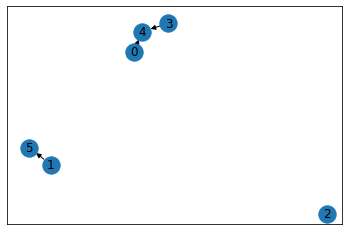

In [8]:
M0.plot()

## Variable-level mappings

We now use our objects to explore variable-level mappings. As discussed above, the variable-level mapping is defined by a *relevant variables set* $R \subseteq \mathcal{X}_{\mathcal{M}}$ and a surjective mapping $a: R \rightarrow \mathcal{X}_{\mathcal{M'}}$.

### Random variable-level mappings

As before, to simplify the instantiation of variable-level mappings, we define two functions that randomly generate what we need:

- *generate_random_R()*: given a model and a number of relevant variables, it randomly selects a subset of relevant variables from the model; $R$ is a sorted numpy array of relevant variables.
- *generate_random_a()*: given a set of relevant variables and a model, it randomly defines a surjective function from the relevant variables to the variables in the model. $a$ is encoded as a binary matrix. 

In [9]:
def generate_random_R(M0,nR):
    # Check nR is less or equal to the variables in M0
    return np.sort(np.random.choice(M0.X,nR,replace=False))

def generate_random_a(R,M1):
    # Check R is greater or equal to the variables in M1
    diff = len(R) - M1.nX
    codomain = list(M1.X.copy()) + list(np.random.choice(M1.X,diff))
    np.random.shuffle(codomain)
    
    a = np.zeros((len(R),M1.nX))
    a[np.arange(len(R)),codomain] = 1
    
    return a

We now instantiate a second model with $5$ nodes/variables.

In [10]:
M1 = FinStochSCM(5,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)

This will allow us to create a variable-level mapping between the base model $\mathcal{M}/\mathtt{M0}$ and $\mathcal{M'}/\mathtt{M1}$.

We start randomly sampling a subset of relevant variables in $\mathcal{M}/\mathtt{M0}$ of cardinality $5$:

In [11]:
R = generate_random_R(M0,5)
print(R)

[0 2 3 4 5]


Then we set up the mapping $a$:

In [12]:
a = generate_random_a(R,M1)
print(a)

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


where rows encode relevant variables and the columns variables in the model $\mathcal{M'}/\mathtt{M1}$.

### Plotting variable-level mappings

To get an intuitive feel of the variable-level mapping we setup a plotting function. This function does some not-very-important work with the networkx DAG in order to rename nodes and plot vertices and edges in different colors. 

In [13]:
def plot_variable_level_mapping(M0,M1,R,a):
    G = M0.G.copy()
    relabel_map = {}
    for n in G.nodes():
        relabel_map[n] = 'M0_'+str(n)
    G0 = nx.relabel.relabel_nodes(G,relabel_map)
    
    G = M1.G.copy()
    relabel_map = {}
    for n in G.nodes():
        relabel_map[n] = 'M1_'+str(n)
    G1 = nx.relabel.relabel_nodes(G,relabel_map)
    
    U = nx.union(G0,G1)
    
    #edge_color=['k']*U.number_of_edges() + ['r']*len(a[0])
    
    edge_list = [('M0_'+str(R[i]), 'M1_'+str(np.where(a[i,:]==1)[0][0])) for i in range(a.shape[0])]
    U.add_edges_from(edge_list)
    
    #for i in range(len(a[0])):
    #    U.add_edge('M0_'+str(a[0][i]), 'M1_'+str(a[1][i])) 
    
    pos = nx.shell_layout(U)
    
    for k in pos.keys():
        if 'M1' in k:
            pos[k] = pos[k] + [10,0]
    
    R_list = np.array(['M0_'+str(R[i]) for i in range(len(R))])
    nR = np.array(list(set(M0.X)-set(R)))
    nR_list = np.array(['M0_'+str(nR[i]) for i in range(len(nR))])
    
    nx.draw_networkx_nodes(U,pos,nodelist=R_list,node_color='b',alpha=.5)
    nx.draw_networkx_nodes(U,pos,nodelist=nR_list,node_color='b',alpha=.2)
    nx.draw_networkx_labels(U,pos)
    nx.draw_networkx_edges(U,pos,edgelist=G0.edges(),edge_color='k')
    
    nx.draw_networkx_nodes(U,pos,nodelist=G1.nodes(),node_color='g',alpha=.5)
    nx.draw_networkx_labels(U,pos)
    nx.draw_networkx_edges(U,pos,edgelist=G1.edges(),edge_color='k')
    
    nx.draw_networkx_edges(U,pos,edgelist=edge_list,edge_color='r',style='dashed')
    #_ = nx.draw(U,pos,with_labels=True,edge_color=['k']*U.number_of_edges())    

We can now show our variable-level mapping:

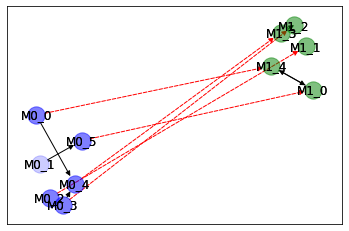

In [14]:
plot_variable_level_mapping(M0,M1,R,a)

Here variables of the base model are shown in blue, dark if relevant ($\in R$) light if not relevant ($\notin R$); variables of the abstracted model are shown in green; internal edges of each model are shown in black; the mapping $a$ is shown in dashed red.

The interpretation of this graph with respect to the category $\mathtt{FinStoch}$ is examined in the following notebook *Abstraction Mapping in FinStoch.ipynb*.

It is easy now to consider and visualize the different types of variable-level mapping we distinguished.

### Complete isomorphic variable-level mapping

A *complete isomorphic* is defined by $$|\mathcal{X}_{\mathcal{M}}| = R = |\mathcal{X}_{\mathcal{M'}}|,$$ that is (nodes in M0) = (relevant nodes) = (nodes in M1).

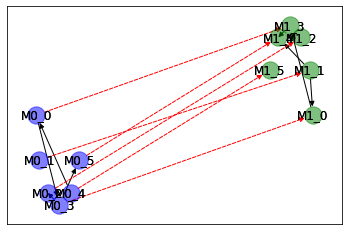

In [15]:
M0 = FinStochSCM(6,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)
M1 = FinStochSCM(6,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)

R = generate_random_R(M0,6)
a = generate_random_a(R,M1)

plot_variable_level_mapping(M0,M1,R,a)

Notice how each node in $\mathtt{M0}$ is relevant (dark blue) and the mapping $a$ is bijective.

### Incomplete isomorphic variable-level mapping

A *incomplete isomorphic* is defined by $$|\mathcal{X}_{\mathcal{M}}| > R = |\mathcal{X}_{\mathcal{M'}}|,$$ that is (nodes in M0) > (relevant nodes) = (nodes in M1).

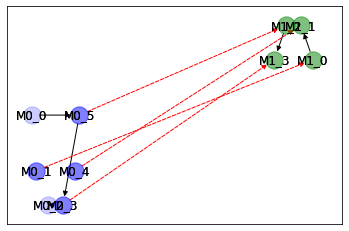

In [16]:
M0 = FinStochSCM(6,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)
M1 = FinStochSCM(4,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)

R = generate_random_R(M0,4)
a = generate_random_a(R,M1)

plot_variable_level_mapping(M0,M1,R,a)

Notice how only a subset of nodes in $\mathtt{M0}$ is relevant (dark blue), and still the mapping $a$ between these relevant nodes and nodes in $\mathtt{M1}$ is bijective.

### Complete non-isomorphic variable-level mapping

A *complete non-isomorphic* is defined by $$|\mathcal{X}_{\mathcal{M}}| = R > |\mathcal{X}_{\mathcal{M'}}|,$$ that is (nodes in M0) = (relevant nodes) > (nodes in M1).

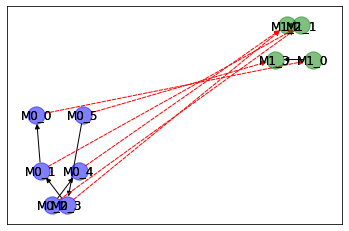

In [17]:
M0 = FinStochSCM(6,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)
M1 = FinStochSCM(4,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)

R = generate_random_R(M0,6)
a = generate_random_a(R,M1)

plot_variable_level_mapping(M0,M1,R,a)

Notice how each node in $\mathtt{M0}$ is relevant (dark blue) and the mapping $a$ is surjective, but, by necessity, not injective.

### Incomplete non-isomorphic variable-level mapping

A *incomplete non-isomorphic* is defined by $$|\mathcal{X}_{\mathcal{M}}| > R > |\mathcal{X}_{\mathcal{M'}}|,$$ that is (nodes in M0) > (relevant nodes) > (nodes in M1).

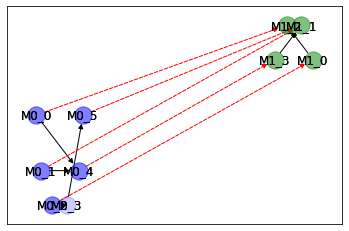

In [18]:
M0 = FinStochSCM(6,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)
M1 = FinStochSCM(4,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)

R = generate_random_R(M0,5)
a = generate_random_a(R,M1)

plot_variable_level_mapping(M0,M1,R,a)

Notice how only a subset of nodes in $\mathtt{M0}$ is relevant (dark blue) and the mapping $a$ is surjective, but, by necessity, not injective.

## Domain-level mappings

The variable-level mapping provides only a first insight on the abstraction, telling us which relevant variables are mapped where.

The domain-level mapping provides a more detailed view. Variables/nodes are now substituted by the set of outcomes underlying each variable, and the connection between base model and abstracted model is now expressed by the stochastic matrices $\alpha_{X'}: \mathcal{M}[a^{-1}(X')] \rightarrow \mathcal{M'}[X']$.

### Random domain-level mapping

We create here too a function to generate random domain-level mappings:

- *generate_random_alphas()*: given two models and a variable-level mapping, it creates the necessary domain-level mappings alpha for each variable in the high-level model. $\alpha$ is a dictionary with an entry for each varialbe in $\mathtt{M1}$; each entry $\alpha_{X'}$ is encoded as a binary matrix.

In [19]:
def generate_random_alphas(M0,M1,R,a):

    alphas = {}
    for n in M1.X:
        incoming_vars = np.where(a[:,n]==1)[0]

        domain = M0.MX[R[incoming_vars[0]]]

        for v in incoming_vars[1:]:
            domain = [x for x in itertools.product(domain,M0.MX[R[int(v)]])]

        if len(domain) < len(M1.MX[n]):
            raise Exception('Can not define a surjective alpha with this a!')
            
        else:
            diff = len(domain) - len(M1.MX[n])
            codomain = list(M1.MX[n].copy()) + list(np.random.choice(M1.MX[n],diff))
            np.random.shuffle(codomain)
        
            alpha = np.zeros((len(domain),len(M1.MX[n])))
            alpha[np.arange(len(domain)),codomain] = 1

            alphas[n] = alpha

    return alphas

### Plotting domain-level mappings

Plotting domain-level mapping is more tricky. We now have a set of functions $\alpha_{X'}: \mathcal{M}[a^{-1}(X')] \rightarrow \mathcal{M'}[X']$, where each function goes from a (Cartesian product of) set(s) to a set. We will rely for the moment on numerical outputs and printouts.  

### First abstraction

We can now instantiate two models $\mathcal{M}/\mathtt{M0}$ and $\mathcal{M'}/\mathtt{M1}$, a complete (random) abstraction defined by the variable-level mapping ($R,a$) and the domain-level mappings ($\alpha_{X'}$).

Notice that we surround the call to the generation of random $\alpha_{X'}$ with a *try... except...* statement.

In [20]:
M0 = FinStochSCM(6,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)
M1 = FinStochSCM(4,
                 f_sets=instantiate_random_sets,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)

R = generate_random_R(M0,5)
a = generate_random_a(R,M1)

try:
    alphas = generate_random_alphas(M0,M1,R,a)
except Exception as err:
    print(err)

Can not define a surjective alpha with this a!


We can not actually generate an abstraction in our case because one or more of the alpha mapping can not be surjective. 

**WARNING:** this behaviour and the following analysis written here depends on the specific random seed (1985) and may differ if the seed is changed.

Let us do some troubleshooting here. Let us look at the variable-level mapping:

In [21]:
print(a)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


Remember that the rows are indexed by $R$, while the column are indexed by $\mathcal{X}_{\mathcal{M'}}$:

In [22]:
print('Row indexes: {0}'.format(', '.join(["X"+str(r) for r in R])))
print('Col indexes: {0}'.format(', '.join(["X'"+str(x) for x in M1.X])))

Row indexes: X0, X2, X3, X4, X5
Col indexes: X'0, X'1, X'2, X'3


Let us extract from $a$ all the mappings:

In [23]:
for i in range(a.shape[1]):
    print("Mapping alpha_X'{0}: {1} -> {2}".format(i, ', '.join(["X"+str(r) for r in R[np.where(a[:,i]==1)[0]]]), "X'"+str(i)))

Mapping alpha_X'0: X2 -> X'0
Mapping alpha_X'1: X5 -> X'1
Mapping alpha_X'2: X3, X4 -> X'2
Mapping alpha_X'3: X0 -> X'3


And let us check the cardinalities of domains and codomains in these mappings:

In [24]:
for i in range(a.shape[1]):
    domains = R[np.where(a[:,i]==1)[0]]
    card_domains = 1
    for d in domains:
        card_domains = card_domains * len(M0.MX[d])
    card_codomains = len(M1.MX[i])
    
    print("Cardinalities in mapping alpha_X'{0}: {1} -> {2}".format(i, card_domains, card_codomains))

Cardinalities in mapping alpha_X'0: 4 -> 1
Cardinalities in mapping alpha_X'1: 2 -> 2
Cardinalities in mapping alpha_X'2: 28 -> 5
Cardinalities in mapping alpha_X'3: 5 -> 6


It is the last mapping $\alpha_{X'_3}$ that is problematic. In our random generation we have stumbled in a situation in which the cardinality of the domain is smaller that the cardinality of the codomain, and hence we can not have a surjective mapping.

### Second abstraction

Our first attempt to abstraction failed not because of a conceptual error, but because of our random generation procedure. To bypass the problem we simply re-define the function *instantiate_random_sets()*. We implement two functions one that likely generates large sets (for the low-level model $\mathcal{M}/\mathtt{M0}$) and one that generates small sets (for the high-level model $\mathcal{M'}/\mathtt{M1}$). This will not definitively solve the problem, but it will significantly increase the probability that we will be able to define a surjective mapping $alpha_{X'}$.

In [25]:
def instantiate_random_sets_large(n_sets):
    cardinalities = np.random.randint(1,12,n_sets)
    return [np.arange(cardinalities[i]) for i in range(len(cardinalities))]

def instantiate_random_sets_small(n_sets):
    cardinalities = np.random.randint(1,3,n_sets)
    return [np.arange(cardinalities[i]) for i in range(len(cardinalities))]

We now re-instantiate the abstraction:

In [26]:
M0 = FinStochSCM(6,
                 f_sets=instantiate_random_sets_large,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)
M1 = FinStochSCM(4,
                 f_sets=instantiate_random_sets_small,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)

R = generate_random_R(M0,5)
a = generate_random_a(R,M1)
alphas = generate_random_alphas(M0,M1,R,a)

This time the instantiation worked. Let's have a peek at what abstraction we have defined, as we did before. We start analyzing $a$:

In [27]:
print(a)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


Notice that $a$ is now different. Let us look at the indexes for the rows ($R$) and the columns ($\mathcal{X}_{\mathcal{M'}}$):

In [28]:
print('Row indexes: {0}'.format(', '.join(["X"+str(r) for r in R])))
print('Col indexes: {0}'.format(', '.join(["X'"+str(x) for x in M1.X])))

Row indexes: X0, X2, X3, X4, X5
Col indexes: X'0, X'1, X'2, X'3


Let us extract from $a$ all the mappings:

In [29]:
for i in range(a.shape[1]):
    print("Mapping alpha_X'{0}: {1} -> {2}".format(i, ', '.join(["X"+str(r) for r in R[np.where(a[:,i]==1)[0]]]), "X'"+str(i)))

Mapping alpha_X'0: X4 -> X'0
Mapping alpha_X'1: X0 -> X'1
Mapping alpha_X'2: X5 -> X'2
Mapping alpha_X'3: X2, X3 -> X'3


And let us check the cardinalities of domains and codomains in these mappings:

In [30]:
for i in range(a.shape[1]):
    domains = R[np.where(a[:,i]==1)[0]]
    card_domains = 1
    for d in domains:
        card_domains = card_domains * len(M0.MX[d])
    card_codomains = len(M1.MX[i])
    
    print("Cardinalities in mapping alpha_X'{0}: {1} -> {2}".format(i, card_domains, card_codomains))

Cardinalities in mapping alpha_X'0: 1 -> 1
Cardinalities in mapping alpha_X'1: 10 -> 2
Cardinalities in mapping alpha_X'2: 9 -> 2
Cardinalities in mapping alpha_X'3: 40 -> 2


Now thanks to the small cardinality of the sets in the high-level model that we have imposed with the function *instantiate_random_sets_small()*, it is trivial to have surjective mappings.

We can last look at the actual mappings in $\alpha$:

In [31]:
alphas

{0: array([[1.]]),
 1: array([[1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.]]),
 2: array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]]),
 3: array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1

## Abstraction

We can now encapsulate variable-level mappings and domain-level mappings into an *Abstraction* class.

### Abstraction class

An abstraction object will have the following attributes:
- *M0*: the base or low-level model; this is an object of class *FinStochSCM*. Mathematically, this is the SCM $\mathcal{M}$.
- *M1*: the abstracted or high-level model; this is an object of class *FinStochSCM*. Mathematically, this is the SCM $\mathcal{M'}$.
- *nR*: the number of relevant variables in M0. Mathematically, this is the cardinality $|R|$.
- *R*: an array of relevant variables. Mathematically, this is the set $R$.
- *a*: a binary matrix encoding the mapping between relevant variables and high-level variables. Mathematically, this is the surjective mapping $a: R \rightarrow \mathcal{X}_{\mathcal{M'}}$.
- *alphas*: a dictionary of binary matrix, each one encoding the mapping from outcomes of low-level variable(s) to outcomes of a high-level variable. Mathematically, this is the collection surjective mappings $\alpha_{X'}: \mathcal{M}[a^{-1}(X')] \rightarrow \mathcal{M'}[X']$.

The methods are:
- *\__init__()*: a versatile constructor that can either set up a specific abstraction (passing a the necessary parameters) or generate a random abstraction (passing random generator functions);
- *set\_...()*: a series of setters to setup the abstraction;
- *copy()*: a method to create a deep copy of the abstraction;
- *is\_...*: a series of tests on the properties of the abstraction;
- *print\_...()*: a series of function to print out details about the abstraction;
- *plot\_()*: method to plot the variable-level abstraction.

In [32]:
class Abstraction():
    def __init__(self,M0,M1, nR, 
                 R=None, a=None, alphas=None,
                 f_R=None, f_a=None, f_alphas=None):
                       
        self.M0 = M0
        self.M1 = M1
        self.nR = nR
        
        self.R = self.set_R(R,f_R)
        self.a = self.set_a(a,f_a)
        self.alphas = self.set_alphas(alphas,f_alphas)
        
    def set_R(self,R,f_R):
        if R is None:
            # TODO:check nR is less or equal to length of M0.X
            R = f_R(self.M0,self.nR)
        
        # TODO:check length of R matches nR
        return R

    def set_a(self,a,f_a):
        if a is None:
            # TODO:check 
            a = f_a(self.R,self.M1)
        
        # TODO:check dimensions of a
        return a

    def set_alphas(self,alphas,f_alphas):
        if alphas is None:
            # TODO:check
            alphas = f_alphas(self.M0,self.M1,self.R,self.a)
        
        # TODO:check dimensions of alpha
        return alphas
        
    def copy(self):
        Acopy = Abstraction(self.M0, self.M1, self.nR, 
                            R=self.R.copy(), a=self.a.copy(), alphas=self.alphas.copy())
        return Acopy
    
    def is_varlevel_complete(self):
        return self.M0.nX == self.nR
    
    def is_varlevel_isomorphic(self):
        return self.a.shape[0] == self.a.shape[1]
    
    def is_domlevel_isomorphic(self):
        for alpha in self.alphas.values():
            print("Mapping alpha_X'{0}: {1}".format(i, alpha.shape[0]==alpha.shape[1]))
    
    def print_M0_cardinalites(self):
        for i in range(self.M0.nX):
            print('M0: cardinality of X{0}: {1}'.format(i,len(self.M0.MX[i])))
    
    def print_R_cardinalites(self):
        for i in range(self.nR):
            print('R: cardinality of X{0}: {1}'.format(self.R[i],len(self.M0.MX[R[i]])))
            
    def print_M1_cardinalites(self):
        for i in range(self.M1.nX):
            print("M1: cardinality of X'{0}: {1}".format(i,len(self.M1.MX[i])))
    
    def print_relevant_vars(self):
        print('R = {0}'.format(', '.join(['X_'+str(r) for r in self.R])))
    
    def print_mapping_a(self):
        print(self.a)
        print('\n')
        print('Row indexes: {0}'.format(', '.join(["X"+str(r) for r in self.R])))
        print('Col indexes: {0}'.format(', '.join(["X'"+str(x) for x in self.M1.X])))
        
    def print_mappings_alphas(self):
        for i in range(self.a.shape[1]):
            domain = self.R[np.where(self.a[:,i]==1)[0]]
            print("Mapping alpha_X'{0}: {1} -> {2}".format(i, ', '.join(["X_"+str(d) for d in domain]), "X'_"+str(i)))
            
    def print_mappings_alphas_cardinalities(self):
        for i in range(self.a.shape[1]):
            domain = self.R[np.where(self.a[:,i]==1)[0]]
            card_domain = 1
            for d in domain:
                card_domain = card_domain * len(self.M0.MX[d])
            card_codomain = len(self.M1.MX[i])

            print("Cardinalities in mapping alpha_X'{0}: {1} -> {2}".format(i, card_domain, card_codomain))
            
    def plot_variable_level_mapping(self):
        G = self.M0.G.copy()
        relabel_map = {}
        for n in G.nodes():
            relabel_map[n] = 'M0_'+str(n)
        G0 = nx.relabel.relabel_nodes(G,relabel_map)

        G = self.M1.G.copy()
        relabel_map = {}
        for n in G.nodes():
            relabel_map[n] = 'M1_'+str(n)
        G1 = nx.relabel.relabel_nodes(G,relabel_map)

        U = nx.union(G0,G1)

        #edge_color=['k']*U.number_of_edges() + ['r']*len(a[0])

        edge_list = [('M0_'+str(self.R[i]), 'M1_'+str(np.where(self.a[i,:]==1)[0][0])) for i in range(self.a.shape[0])]
        U.add_edges_from(edge_list)

        #for i in range(len(a[0])):
        #    U.add_edge('M0_'+str(a[0][i]), 'M1_'+str(a[1][i])) 

        pos = nx.shell_layout(U)

        for k in pos.keys():
            if 'M1' in k:
                pos[k] = pos[k] + [10,0]

        R_list = np.array(['M0_'+str(self.R[i]) for i in range(len(self.R))])
        nR = np.array(list(set(self.M0.X)-set(self.R)))
        nR_list = np.array(['M0_'+str(nR[i]) for i in range(len(nR))])

        nx.draw_networkx_nodes(U,pos,nodelist=R_list,node_color='b',alpha=.5)
        nx.draw_networkx_nodes(U,pos,nodelist=nR_list,node_color='b',alpha=.2)
        nx.draw_networkx_labels(U,pos)
        nx.draw_networkx_edges(U,pos,edgelist=G0.edges(),edge_color='k')

        nx.draw_networkx_nodes(U,pos,nodelist=G1.nodes(),node_color='g',alpha=.5)
        nx.draw_networkx_labels(U,pos)
        nx.draw_networkx_edges(U,pos,edgelist=G1.edges(),edge_color='k')

        nx.draw_networkx_edges(U,pos,edgelist=edge_list,edge_color='r',style='dashed')

We can test this class by re-running the previous example:

In [33]:
M0 = FinStochSCM(6,
                 f_sets=instantiate_random_sets_large,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)
M1 = FinStochSCM(4,
                 f_sets=instantiate_random_sets_small,
                 f_links=instantiate_random_links,
                 f_stochmatrices=instantiate_random_stochmatrices)

A = Abstraction(M0,M1,5,
               f_R=generate_random_R,
               f_a=generate_random_a,
               f_alphas=generate_random_alphas)

The *print_...()* function of the *Abstraction* object gives us an easy way to check our abstraction:

In [34]:
A.print_mappings_alphas_cardinalities()

Cardinalities in mapping alpha_X'0: 7 -> 1
Cardinalities in mapping alpha_X'1: 8 -> 2
Cardinalities in mapping alpha_X'2: 10 -> 1
Cardinalities in mapping alpha_X'3: 48 -> 1


## Example (I)

We now take a look again at the running example in the notebook *Categorical Abstraction.ipynb*, which corresponded to the example in Sections 4.11-4.13 of [1].

### Model M0

First, we define model $\mathcal{M}/\mathtt{M0}$. We relabel the *smoking* node as $S \mapsto 0$; the *tar deposit* node as $T \mapsto 1$; and the *cancer* node as $C \mapsto 2$.

Every node has a binary domain, which we define through *sets*.

In [35]:
sets = [np.arange(2),np.arange(2),np.arange(2)]

In *links* we specify the edges of the underlying graph, that is $S \rightarrow T \rightarrow C$ or $0 \rightarrow 1 \rightarrow 2$.

In [36]:
links = [('0','1'),('1','2')]

Finally, in *stochmatrices* we define the stochastic matrices corresponding to the mechanism of every node (see the previous notebook *Categorical Abstraction.ipynb* for details on these matrices).

In [37]:
stochmatrices = {'0': np.array([.8,.2]),
                '1': np.array([[1,0],[.2,.8]]),
                '2': np.array([[.9,.1],[.6,.4]])}

Finally we can instantiate the model and plot it.

In [38]:
M0 = FinStochSCM(3, sets=sets, links= links, stochmatrices=stochmatrices)

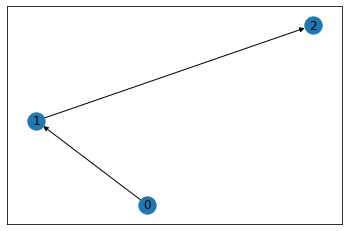

In [39]:
M0.plot()

### Model M1

We now follow the same approach to define model $\mathcal{M'}/\mathtt{M1}$. In this case we have only two nodes: the *smoking* node relabeled as $S \mapsto 0$; and the *cancer* node relabeled as $C \mapsto 1$.

We then define *sets*, *links*, and *stochmatrices*.

In [40]:
sets = [np.arange(2),np.arange(2)]

In [41]:
links = [('0','1')]

In [42]:
stochmatrices = {'0': np.array([.8,.2]),
                '1': np.array([[.9,.1],[.66,.34]])}

We instantiate the new model, and plot it.

In [43]:
M1 = FinStochSCM(2, sets=sets, links= links, stochmatrices=stochmatrices)

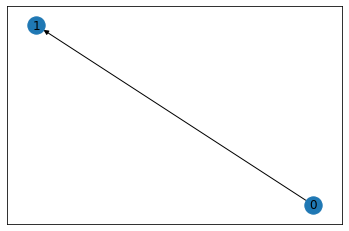

In [44]:
M1.plot()

### Variable-level mapping

Next, we implement an abstraction between the two models, $\mathcal{M}/\mathtt{M0}$ being the base or low-level model and $\mathcal{M'}/\mathtt{M1}$ being the abstracted or high-level model.

We start defining the variable-level mapping.

First, we need to define the restriction $R$. The node in $\mathcal{M}/\mathtt{M0}$ we are interested in are the *smoking* node ($0$) and the *cancer* node ($2$).

In [45]:
R = np.array([0,2])

Next we need a surjective mapping $a: R \rightarrow \mathcal{X}_{\mathcal{M'}}$. This is the trivial mapping that sends the *smoking* variable in $\mathtt{M0}$ ($0$) to the *smoking* variable in $\mathtt{M1}$ ($0$), and the *cancer* variable in $\mathtt{M0}$ ($2$) to the *cancer* variable in $\mathtt{M1}$ ($1$). The mapping is then given by an identity matrix (remember that while the *cancer* variable in $\mathtt{M0}$ has index $2$, it has index $1$ in $R$). 

In [46]:
a = np.eye(2)

Notice that, overall, we have a *variable-level mapping* that is **incomplete** (as we dropped $T$) and **isomorphic** (as we have a surjective and injective mapping between $R$ and $\mathcal{X}_{\mathcal{M'}}$).

### Domain-level mapping

We then move to specify the domain-level mapping by defining the collection of surjective mappings $\alpha_{X'}: \mathcal{M}[a^{-1}(X')] \rightarrow \mathcal{M'}[X']$. These mappings too are trivial since they map each outcome in the low-level model to the equivalent outcome in the high-level model.

In [47]:
alphas = {'0': np.eye(2),
         '1': np.eye(2)}

Overall we have a *domain-level mapping* that is **isomorphic** for each map $\alpha_{X'}$, since each one is surjective and injective.

### Abstraction

Finally, we put everything together to define our abstraction.

In [48]:
A = Abstraction(M0,M1,2,R,a,alphas)

We can now test properties of the abstraction, as well as plot the variable-level mapping.

In [49]:
A.print_R_cardinalites()

R: cardinality of X0: 2
R: cardinality of X2: 2


In [50]:
A.print_mappings_alphas()

Mapping alpha_X'0: X_0 -> X'_0
Mapping alpha_X'1: X_2 -> X'_1


In [51]:
A.is_varlevel_complete()

False

In [52]:
A.is_varlevel_isomorphic()

True

In [53]:
A.is_domlevel_isomorphic()

Mapping alpha_X'3: True
Mapping alpha_X'3: True


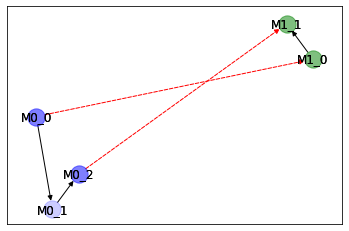

In [54]:
A.plot_variable_level_mapping()

## Example (II)

We can also implement and have a look to the example that we introduced in our discussion above about the limitations of the definition of abstraction.

### Model M0

Model $\mathcal{M}/\mathtt{M0}$ is a simple model defined over to binary variables with arbitrary stochastic matrices.

In [75]:
sets = [np.arange(2),np.arange(2)]

In [76]:
links = [('0','1')]

In [77]:
rvals = np.random.randn(3)

stochmatrices = {'0': np.array([rvals[0],1-rvals[0]]),
                '1': np.array([[rvals[1],1-rvals[1]],[rvals[2],1-rvals[2]]])}

Finally we can instantiate the model and plot it.

In [78]:
M0 = FinStochSCM(2, sets=sets, links= links, stochmatrices=stochmatrices)

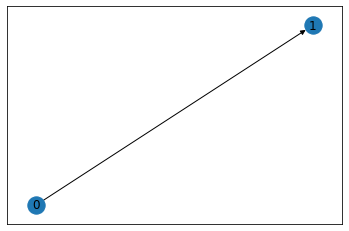

In [79]:
M0.plot()

### Model M1

Model $\mathcal{M'}/\mathtt{M1}$ is identical to $\mathcal{M}/\mathtt{M0}$ except that it reverts the direction of the causality.

In [80]:
sets = [np.arange(2),np.arange(2)]

In [81]:
links = [('1','0')]

In [82]:
rvals = np.random.randn(3)

stochmatrices = {'0': np.array([rvals[0],1-rvals[0]]),
                '1': np.array([[rvals[1],1-rvals[1]],[rvals[2],1-rvals[2]]])}

We instantiate the new model, and plot it.

In [83]:
M1 = FinStochSCM(2, sets=sets, links= links, stochmatrices=stochmatrices)

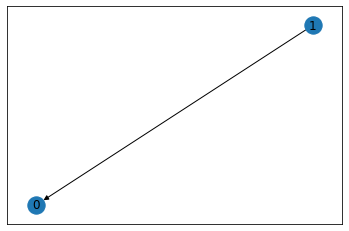

In [84]:
M1.plot()

### Variable-level mapping

Next, we implement the abstraction between the two models that we described above, starting with the variable-level mapping.

The restriction $R$ is simply the whole set of variables in the base model.

In [85]:
R = np.array([0,1])

The surjective mapping $a: R \rightarrow \mathcal{X}_{\mathcal{M'}}$ is then given by an identity matrix, mapping variables $0 \mapsto 0$ and $1 \mapsto 1$. 

In [86]:
a = np.eye(2)

Overall, this is a *variable-level mapping* that is **complete** and **isomorphic**.

### Domain-level mapping

The domain-level mapping $\alpha_{X'}: \mathcal{M}[a^{-1}(X')] \rightarrow \mathcal{M'}[X']$ is simply a collection of identity matrices.

In [87]:
alphas = {'0': np.eye(2),
         '1': np.eye(2)}

Overall the *domain-level mapping* that is **isomorphic**.

### Abstraction

Finally, we put everything together to define our abstraction.

In [88]:
A = Abstraction(M0,M1,2,R,a,alphas)

We can now test properties of the abstraction, as well as plot the variable-level mapping.

In [89]:
A.print_R_cardinalites()

R: cardinality of X0: 2
R: cardinality of X1: 2


In [90]:
A.print_mappings_alphas()

Mapping alpha_X'0: X_0 -> X'_0
Mapping alpha_X'1: X_1 -> X'_1


In [91]:
A.is_varlevel_complete()

True

In [92]:
A.is_varlevel_isomorphic()

True

In [93]:
A.is_domlevel_isomorphic()

Mapping alpha_X'3: True
Mapping alpha_X'3: True


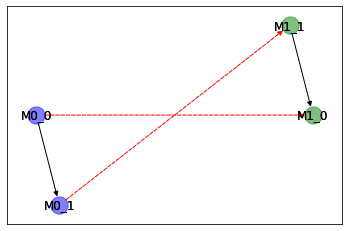

In [94]:
A.plot_variable_level_mapping()

The definition of abstraction is legitimate then, although, as clear from the plot, our abstraction ends up distorting the directionality of cause and effect.

# Conclusion

In this notebook we have dove deep in the definition of abstraction proposed in [1]. We have split the idea of abstraction in two levels, a *variable-level mapping* and a *domain-level mapping*, and we have discussed properties and implications of each mapping. We have also highlighted some limitations implicit in the definition, which introduced us to the further issue of *consistency among causal models*. Finally, we have provided class implementations for SCMs and abstractions that offer a programmatic way to analyze abstractions between causal models.

## Bibliography

[1] Rischel, Eigil Fjeldgren. "The Category Theory of Causal Models." (2020).

[2] Pearl, Judea. Causality. Cambridge university press, 2009.

[3] Peters, Jonas, Dominik Janzing, and Bernhard Schölkopf. Elements of causal inference: foundations and learning algorithms. The MIT Press, 2017.

[4] Spivak, David I. Category theory for the sciences. MIT Press, 2014.

[5] Fong, Brendan, and David I. Spivak. "Seven sketches in compositionality: An invitation to applied category theory." arXiv preprint arXiv:1803.05316 (2018).